In [5]:
%matplotlib inline
import numpy as np
import random
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import entropy as scent
from matplotlib import gridspec
import matplotlib.image as mpimg
from scipy.stats import zscore 
import collections

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


def KL_sym_func(scores1, scores2):
    """Note, scores must be cats by samples"""
    KL_F = scent(scores1, scores2)
    KL_R = scent(scores2, scores1)
    measure = KL_F + KL_R
    return measure

bins = np.load('human_bincounts.npy')
humans = bins / np.sum(bins, axis = 1)[:, np.newaxis]
humans_smoothed = (bins +1) / np.sum(bins, axis = 1)[:, np.newaxis]

ordered_filenames = np.load('decoded_test_filename_order.npy')

labels = ['P', 'A', 'B', 'C', 'De', 'Do', 'F', 'H', 'S', 'T']

im_dir = '/home/battleday/Academic/Berkeley/Superman/local/images/test_images_named'

In [6]:
mod_files = os.listdir('.')
print(mod_files)
mod_files = sorted([m for m in mod_files if m[-4:] == '.npz'])
print(mod_files)

post_files = os.listdir('./post/')
print(post_files)
post_files = sorted([p for p in post_files if p[-4:] == '.npz'])
print(post_files)

['vgg_15_BN_64.npz', 'resnet_preact_bottleneck_164.npz', 'post', '.ipynb_checkpoints', 'resnext_29_8x64d.npz', 'wrn_28_10.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'entropy_fig-v1.ipynb', 'figs', 'decoded_test_filename_order.npy', 'fig_1_conf_hum_idxs.npy', 'densenet_BC_100_12.npz', 'resnet_basic_110.npz', 'human_bincounts.npy', 'fig_1_conf_mod_idxs.npy', 'example_images_fig.ipynb', 'example_images_fig_v2.ipynb', 'fig_1_difference_idxs.npy', 'pyramidnet_basic_110_270.npz', 'entropy_fig_v2.ipynb']
['densenet_BC_100_12.npz', 'pyramidnet_basic_110_270.npz', 'resnet_basic_110.npz', 'resnet_preact_bottleneck_164.npz', 'resnext_29_8x64d.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'vgg_15_BN_64.npz', 'wrn_28_10.npz']
['vgg_15_BN_64.npz', 'resnet_preact_bottleneck_164.npz', 'resnext_29_8x64d.npz', 'wrn_28_10.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'densenet_BC_100_12.npz', 'resnet_basic_110.npz', 'pyramidnet_basic_110_270.npz']
['densenet_BC_100_12.npz', 'pyramidnet_basic_110_27

In [7]:
model_dict = collections.OrderedDict()
for m in mod_files:
    raw = np.load(m)
    raw_outs = raw['outputs']
    for raw_i in np.arange(raw_outs.shape[0]): 
        raw_outs[raw_i] = softmax(raw_outs[raw_i])
    model_dict[m.split('.')[0]] = raw_outs
print(model_dict.keys())

odict_keys(['densenet_BC_100_12', 'pyramidnet_basic_110_270', 'resnet_basic_110', 'resnet_preact_bottleneck_164', 'resnext_29_8x64d', 'shake_shake_26_2x64d_SSI_cutout16', 'vgg_15_BN_64', 'wrn_28_10'])


In [8]:
post_dict = collections.OrderedDict()

for p in post_files:
    raw = np.load('./post/' + p)
    raw_outs = raw['outputs']
    for raw_i in np.arange(raw_outs.shape[0]): 
        raw_outs[raw_i] = softmax(raw_outs[raw_i])
    post_dict[p.split('.')[0]] = raw_outs
    
print(post_dict.keys())

odict_keys(['densenet_BC_100_12', 'pyramidnet_basic_110_270', 'resnet_basic_110', 'resnet_preact_bottleneck_164', 'resnext_29_8x64d', 'shake_shake_26_2x64d_SSI_cutout16', 'vgg_15_BN_64', 'wrn_28_10'])


In [10]:
k = 'shake_shake_26_2x64d_SSI_cutout16'#
mod = {k: model_dict[k]}
model_scores = mod[k]
mod_ent = scent(model_scores.T)
print(mod_ent.shape)

human_ent = scent(humans_smoothed.T)

sym_KL = KL_sym_func(humans_smoothed.T, mod_scores.T)
match = (np.argmax(humans, axis=1) == np.argmax(mod_scores, axis = 1))
print(match[:3], np.where(match)[0].shape[0], match.shape)


(10000,)


NameError: name 'mod_scores' is not defined

In [66]:
def fig_fn(title, save_path, idx_rows, humans, model_scores,
           num_ims, added_rows, bolded_axes,
           base_rows = 3 + 1):
    """still a bunch of other things defined above
    that aren't in here.
    
    Model dict is ordered dict that includes humans"""
    
    fig = plt.figure(figsize=((num_ims) * 2, 8))
    gs = gridspec.GridSpec(14, num_ims)
    
    #fig.suptitle(title, fontsize = 17, fontweight='bold')
    for row in np.arange(3):
        row_idx = idx_rows[row]
        for i in np.arange(num_ims):
            im = row_idx[i]
            ax_im_b = plt.subplot(gs[row*5:2 + (row*5), i]) # size of im
            im_name_b = ordered_filenames[im]
            ax_im_b.xaxis.set_ticklabels([])
            ax_im_b.set_xticks([])
            ax_im_b.set_yticks([])
            #ax_im_b.set_title(labels[0], fontsize = 12)
            ax_im_b.yaxis.set_ticklabels([])
            img_b = mpimg.imread(im_dir + '/' + im_name_b)
            #ax_im_b.set_title('High certainty image', fontsize = 20)
            ax_im_b.imshow(img_b)


            im_guesses = humans[row_idx[i]]
            #print(im_guesses)
            ax_hist_b = plt.subplot(gs[2 + (row*5), i])
            ax_hist_b.bar(np.arange(10), im_guesses, color='k') #, align = 'left')
            ax_hist_b.set_xlim([-1, 10])
            ax_hist_b.set_ylim([0, 1]) 

            if ax_hist_b.is_first_col():
                ax_hist_b.set_ylabel('Hum', fontsize = 12)
            else:
                ax_hist_b.yaxis.set_ticks([])

            ax_hist_b.xaxis.set_ticks([])

            mod_guesses = model_scores[row_idx[i]]
            ax_hist_n = plt.subplot(gs[3 + (row*5), i])
            ax_hist_n.bar(np.arange(10), mod_guesses, color='k') #, align = 'left')
            ax_hist_n.set_xlim([-1, 10])
            ax_hist_n.set_ylim([0, 1]) 

            if ax_hist_n.is_first_col():
                ax_hist_n.set_ylabel('Sh-Sh', fontsize = 12) 
                    
            else:
                ax_hist_n.yaxis.set_ticks([])
            ax_hist_n.xaxis.set_ticks([])

                
            ax_hist_n.xaxis.set_ticks(np.arange(len(labels)))
            ax_hist_n.xaxis.set_ticklabels(labels)

            plt.xticks(rotation = -45, ha='center')
    plt.subplots_adjust(hspace = 0.4)
    plt.savefig(save_path + '/' + title + '.pdf', bbox_inches='tight')



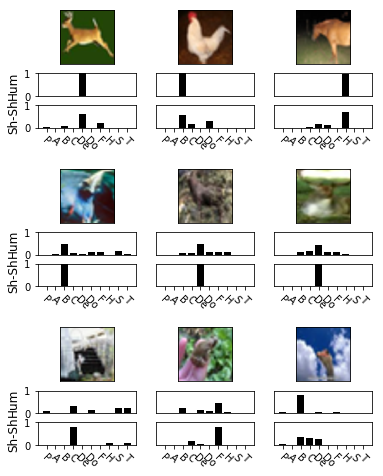

In [67]:
model_scores = mod[k]
row_1 = np.load('fig_1_conf_hum_idxs.npy')
row_2 = np.load('fig_1_conf_mod_idxs.npy')
row_3 = np.load('fig_1_difference_idxs.npy')

rows = np.vstack([row_1, row_2, row_3])
print
added_rows = 1
num_ims = 3
fig_fn('Master', 'figs', 
       rows, humans, model_scores, 
       num_ims, added_rows, [])

In [ ]:

high_hum_low_mod = np.argsort(mod_ent - (human_ent * match)) # this removes non-matches
#print(high_hum_low_mod)
idxs = [0, 1, 2, 3, 5]
np.save('fig_1_conf_hum_idxs.npy', np.array(high_hum_low_mod[idxs]))

fig_fn('High hum low mod {0}'.format(k), 'figs', high_hum_low_mod, humans, mod, num_ims, added_rows, [])

In [ ]:
#inner_term = zscore(zscore(human_ent*match) * zscore(mod_ent*match)) * zscore(sym_KL)

comb = (mod_scores + humans_smoothed) 
print(comb.shape)
print(np.sum(comb).shape)
norm_comb = comb / np.sum(comb, axis=1)[:, np.newaxis]
print(norm_comb.sum())
inner_term = scent(norm_comb) #[:, np.newaxis]

inner_term = 10*zscore(zscore(human_ent*match) * zscore(mod_ent*match)) + zscore(sym_KL)

#print(np.sum(inner_term, axis=1))
high_hum_high_mod = (np.argsort(inner_term)[::-1]) # this removes non-matches
print(high_hum_high_mod.shape)
print(high_hum_high_mod[2]) #, 4, 5, 6, 7])
idxs = [2, 4, 5, 6, 7]
np.save('fig_1_difference_idxs.npy', np.array(high_hum_high_mod[idxs]))

fig_fn('High hum high mod {0}'.format(k), 'figs', high_hum_high_mod, humans, mod, num_ims, added_rows, [])

In [ ]:
a = np.array([0, 1])
print(a)
print(a)